In [24]:
import pandas as pd
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = pd.read_csv('iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


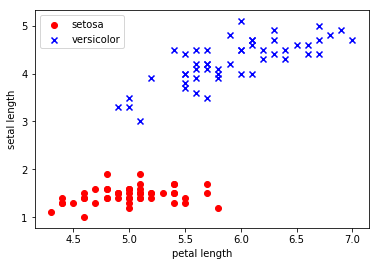

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('setal length')
plt.legend(loc = 'upper left')
plt.show()

In [29]:
# normalize data
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

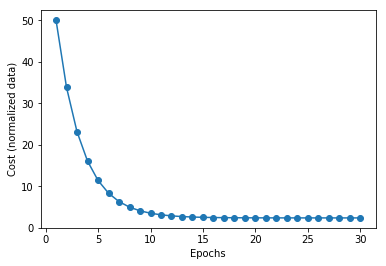

In [34]:
from perceptron import AdalineGD
ppn = AdalineGD(eta = 0.01, n_iter = 30)
ppn.fit(X_std, y)
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Cost (normalized data)')
plt.show()

In [32]:
ppn.w_

array([  1.31006317e-16,  -1.72797428e-01,   1.09512735e+00])

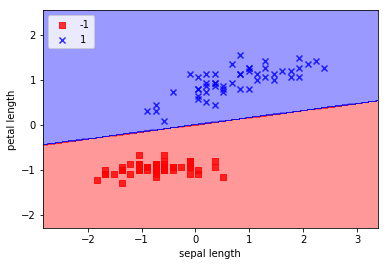

In [35]:
from plot_decision_regions import *
plot_decision_regions(X_std, y, classifier = ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()